In [1]:
import pandas as pd
import time
import requests

### Importing Yearly Standard Deviations

In [3]:
!pip install lxml

  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/c3/b5/91c2249bfac02ee514ab135e9304b89d55967be7e53e94a879b74eec7a5c/lxml-5.3.0-cp311-cp311-win_amd64.whl.metadata
Using cached lxml-5.3.0-cp311-cp311-win_amd64.whl (3.8 MB)



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
pd.set_option('display.max_columns', None)

first_time = True

if first_time:
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    
    dics = []
    
    avgs_url = 'https://www.pro-football-reference.com/years/NFL/passing.htm'
    means = pd.read_html(avgs_url, header=1)[0]
    
    time.sleep(3.1)
    
    
    for i in range(1960, 2024):
        url = f'https://www.pro-football-reference.com/years/{i}/passing.htm'
        df = pd.read_html(url)[0]
        if i == 1960:
            gp = 12
        elif 1961 <= i <= 1977:
            gp = 14
        elif i == 1982:
            gp = 9
        elif i == 1987:
            gp = 15
        elif i >= 2021:
            gp = 17
        else:
            gp = 16
    
        min_att = 14*gp
        df = df[df['Att'] >= min_att]
    
        year_dict = {"Year": i, "Mean": means[means['Year'] == str(i)].iloc[0]['ANY/A'], "StD": df['ANY/A'].std()}
    
        dics.append(year_dict)
        print(f"Year {i} Complete!")
    
        time.sleep(3.1)
    
    year_by_year = pd.DataFrame(dics)

    year_by_year.to_csv('passing_distribution.csv')
else:
    year_by_year = pd.read_csv('passing_distribution.csv')


year_by_year

Year 1960 Complete!
Year 1961 Complete!
Year 1962 Complete!
Year 1963 Complete!
Year 1964 Complete!
Year 1965 Complete!
Year 1966 Complete!
Year 1967 Complete!
Year 1968 Complete!
Year 1969 Complete!
Year 1970 Complete!
Year 1971 Complete!
Year 1972 Complete!
Year 1973 Complete!
Year 1974 Complete!
Year 1975 Complete!
Year 1976 Complete!
Year 1977 Complete!
Year 1978 Complete!
Year 1979 Complete!
Year 1980 Complete!
Year 1981 Complete!
Year 1982 Complete!
Year 1983 Complete!
Year 1984 Complete!
Year 1985 Complete!
Year 1986 Complete!
Year 1987 Complete!
Year 1988 Complete!
Year 1989 Complete!
Year 1990 Complete!
Year 1991 Complete!
Year 1992 Complete!
Year 1993 Complete!
Year 1994 Complete!
Year 1995 Complete!
Year 1996 Complete!
Year 1997 Complete!
Year 1998 Complete!
Year 1999 Complete!
Year 2000 Complete!
Year 2001 Complete!
Year 2002 Complete!
Year 2003 Complete!
Year 2004 Complete!
Year 2005 Complete!
Year 2006 Complete!
Year 2007 Complete!
Year 2008 Complete!
Year 2009 Complete!


,Year,Mean,StD
0,1960,4.5,2.390281
1,1961,4.9,1.582216
2,1962,5.5,1.191261
3,1963,4.9,1.204944
4,1964,4.6,1.510419
5,1965,5.0,1.507925
6,1966,4.3,1.699860
7,1967,4.3,1.518636
8,1968,4.5,1.492400
9,1969,4.7,0.696656


In [30]:
url = 'https://www.pro-football-reference.com/leaders/pass_att_career.htm'
df_att = pd.read_html(url)[0]
df_qual = df_att[df_att['Att'] >= 2000]
df_qual

,Rank,Player,Att,Years,Tm
0,1.0,Tom Brady,12050,2000-2022,2TM
1,2.0,Drew Brees,10551,2001-2020,2TM
2,3.0,Brett Favre+,10169,1991-2010,4TM
3,4.0,Peyton Manning+,9380,1998-2015,2TM
4,5.0,Matt Ryan,8464,2008-2022,2TM
5,6.0,Ben Roethlisberger,8443,2004-2021,pit
6,7.0,Dan Marino+,8358,1983-1999,mia
7,8.0,Philip Rivers,8134,2004-2020,2TM
8,9.0,Eli Manning,8119,2004-2019,nyg
9,10.0,Aaron Rodgers,8041,2005-2024,2TM


In [32]:
year_by_year['CV'] = year_by_year["StD"] / year_by_year['Mean'].astype(float)

year_by_year

,Year,Mean,StD,CV
0,1960,4.5,2.390281,0.531174
1,1961,4.9,1.582216,0.322901
2,1962,5.5,1.191261,0.216593
3,1963,4.9,1.204944,0.245907
4,1964,4.6,1.510419,0.328352
5,1965,5.0,1.507925,0.301585
6,1966,4.3,1.699860,0.395316
7,1967,4.3,1.518636,0.353171
8,1968,4.5,1.492400,0.331644
9,1969,4.7,0.696656,0.148225


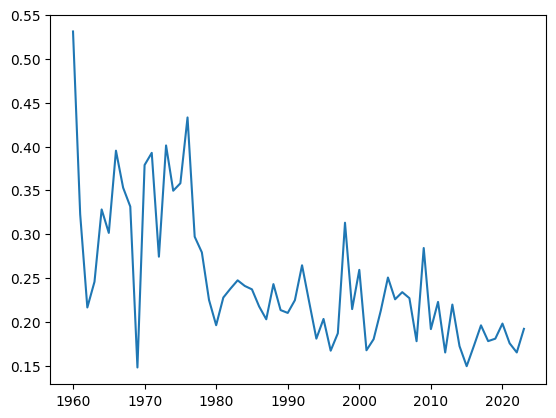

In [33]:
plt.plot(year_by_year['Year'], year_by_year['CV'])